In [78]:
import matplotlib.pyplot as plt
import networkx as nx

from patch_workshop.utils import create_graph
from patch_workshop.inequality_metrics import\
    compute_gini, compute_stoch_dom
from patch_workshop.homophily_metrics import compute_ei_index
from patch_workshop.constants import LFM_RANDOM, LFM_HOMOPHILY, LFM_PAH
from patch_workshop.stats import compute_cdf

In [79]:
SEED = 5 # Fix seed for reproducibility

In [80]:
g = create_graph(
    N=200, # Number of nodes
    m=2, # Number of edges per new node
    f_m=0.3, # Minority fraction
    h=0.8, # Homophily value
    tc=0.5, # Change of the edges (starting from second) to be local (triadic closure)
    lfm_global=LFM_PAH, lfm_local=LFM_PAH, # Link formation mechanisms for local and global links
    seed=SEED)

In [81]:
min([g.degree(n) for n in g.nodes])


2

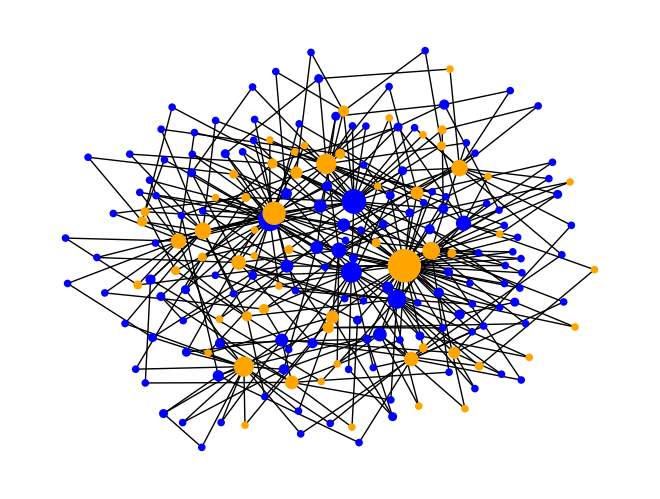

In [82]:
layout = nx.kamada_kawai_layout(g)
nx.draw(
    g, layout,
    node_color=["orange" if g.nodes[n]['m'] else "blue"\
        for n in g.nodes],
    node_size=[10*k for _, k in g.degree()])

In [83]:
nodes_min = [n for n in g.nodes if g.nodes[n]['m']]

gini = compute_gini(g)
ei_index = compute_ei_index(g, nodes_min=nodes_min)[2]
stoch_dom = compute_stoch_dom(g, minority_nodes=nodes_min)

print(f"Gini: {gini}")
print(f"EI index: {ei_index}")
print(f"Stochastic dominance: {stoch_dom}")

Gini: 0.41397984886649875
EI index: 0.5214105793450882
Stochastic dominance: 0.2767857142857142


Text(0, 0.5, 'CCDF')

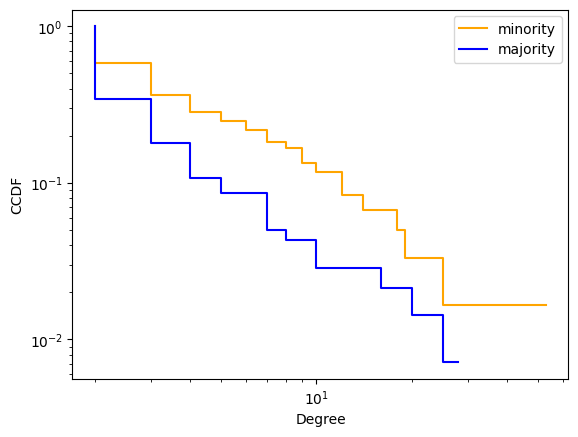

In [84]:
a_k_min, a_y_min = compute_cdf([k for node, k in g.degree() if g.nodes[node]["m"]])
a_k_maj, a_y_maj = compute_cdf([k for node, k in g.degree() if not g.nodes[node]["m"]])
plt.step(a_k_min, 1 - a_y_min, color="orange", label="minority")
plt.step(a_k_maj, 1 - a_y_maj, color="blue", label="majority")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.xlabel("Degree")
plt.ylabel("CCDF")